In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
data_dir = '../input'

In [3]:
visa = pd.read_csv(f'{data_dir}/VisaPremier.txt', delim_whitespace=True)

## Exploration des données:

Il existe des variables qui représentent la même information sous deux formes (chaîne de caractères / entiers)

- cartevp / cartevpr
- sexe / sexer

Les types de variables sont les suivants:
- Categorielles:
    - matricul: identifiant (inutile pour l'analyse et le classement)
    
    - cartevp/cartevpr: possession de la carte Visa Premier (binaire). variable a predire
    - codeqlt: code de qualite du client evalue par la banque (A - E)
    - csp: categorie socio-professionnelle (8 valeurs)
    - departem: departement de residence
    - sexe/sexer: le sexe du client (binaire)
    - sitfamil: situation familiale (6 valeurs)
    
- Numeriques:
    - age: l'age du client (annees)
    - agemvt: age du dernier mouvement (jours)
    - anciente: anciennete de la relation (mois)
    - aveparfi: total des avoirs epargne financiere (francs)
    - aveparmo: total des avoirs epargne monetaire (francs)
    - avtscpte: total des avoirs sur tous les comptes (francs) --> `avtscpte ?= aveparfi + aveparmo + ...`
    - endette: taux d'endettement (pourcentage)
    - engagemc: Total des engagements court terme (francs)
    - engageml: Engagement long terme
    - engagemm: Total des engagements moyen terme
    - engagemt: Total des engagements (francs) --> `engagemt = engagemc + engagemm + engageml`
    - moycred3: Moyenne des mouvements nets créditeurs des 3 mois (milliers de francs)
    - moycredi: Moyenne des mouvements créditeurs (milliers de francs)
    - moysold3: Moyenne des soldes moyens sur 3 mois
    - mtbon: Montant des produits bons et certificats (francs)
    - mteparlo: Montant des produits d’épargne logement (francs)
    - mteparlt: Montant des produits d’épargne long terme (francs)
    - mteparmo: Montant des produits d’épargne monétaire (francs)
    - mteparte: Nombre de produits épargne à terme
    - mtfactur: Montant facturé dans l’année
    - mtlivret: Montant des comptes sur livret (francs)
    - mtrejet: montant total des rejets (francs)
    - mtvie: Montant des produits contrats vie (francs)
    - nbbon: Nombre de produits bons et certificats
    - nbcb: Nombre total de cartes
    - nbcptar:  Nombre de cartes point argent
    - nbcptvue: Nombre de comptes à vue
    - nbeparlo: Nombre de produits d’épargne logement
    - nbeparlt:  Nombre de produits d’épargne long terme
    - nbeparmo: Nombre de produits épargne monétaire
    - nbeparte: Montant des produits épargne à terme
    - nbimpaye: nombre d'impayés en cours
    - nbjdebit: Nombre de jours de débit
    - nblivret: Nombre de comptes sur livret
    - nbop: Nombre d’opérations à M-1
    - nbopguic: nombre d'opérations par gichets dans le mois
    - nbpaiecb: Nombre de paiements par carte bancaire à M-1
    - nbvie: Nombre de produits contrats vie
    - ptvente: point de vente (nombre de points de vente?)

Les valeurs manquantes qui existent dans les variables sont representees par des '.' (ou F.)

In [4]:
visa.columns

Index(['matricul', 'departem', 'ptvente', 'sexe', 'age', 'sitfamil',
       'anciente', 'csp', 'codeqlt', 'nbimpaye', 'mtrejet', 'nbopguic',
       'moycred3', 'aveparmo', 'endette', 'engagemt', 'engagemc', 'engagemm',
       'nbcptvue', 'moysold3', 'moycredi', 'agemvt', 'nbop', 'mtfactur',
       'engageml', 'nbvie', 'mtvie', 'nbeparmo', 'mteparmo', 'nbeparlo',
       'mteparlo', 'nblivret', 'mtlivret', 'nbeparlt', 'mteparlt', 'nbeparte',
       'mteparte', 'nbbon', 'mtbon', 'nbpaiecb', 'nbcb', 'nbcbptar',
       'avtscpte', 'aveparfi', 'cartevp', 'sexer', 'cartevpr', 'nbjdebit'],
      dtype='object')

In [5]:
quali_vars = ['codeqlt', 'csp', 'departem', 'sexe', 'sitfamil'] # 'cartevpr', 'sexer' 
quanti_vars = ['age', 'agemvt', 'anciente', 'aveparfi', 'aveparmo', 'avtscpte',
               'endette', 'engagemc', 'engageml', 'engagemm', 'engagemt',
               'moycred3', 'moycredi', 'moysold3', 'mtbon', 'mteparlo', 'mteparlt',
               'mteparmo', 'mteparte', 'mtfactur', 'mtlivret', 'mtrejet', 'mtvie',
               'nbbon', 'nbcb', 'nbcbptar', 'nbcptvue', 'nbeparlo', 'nbeparlt',
               'nbeparmo', 'nbeparte', 'nbimpaye', 'nbjdebit', 'nblivret',
               'nbop', 'nbopguic', 'nbpaiecb', 'nbvie', 'ptvente']

In [6]:
# visa[['aveparfi', 'aveparmo']].sum(axis=1).head(), visa.avtscpte.head()
# (visa[['engagemc', 'engagemm', 'engageml']].sum(axis=1).head() != visa.engagemt.head()).sum()

In [7]:
visa.shape

(1073, 48)

### Analyse des valeurs manquantes

In [8]:
na_count = visa.isnull().sum()
na_count[na_count != 0]

Series([], dtype: int64)

In [9]:
visa.matricul.unique().shape

(1073,)

In [10]:
dots = ((visa == '.') | (visa == 'F.'))
dot_count = dots.sum()
dot_count[dot_count != 0] / dot_count.shape[0]

/mnt/c/python-envs/mlds/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


departem    0.145833
sitfamil    0.666667
codeqlt     2.770833
agemvt      0.125000
nbpaiecb    5.791667
dtype: float64

In [11]:
dots.sum(axis=1).value_counts()

0    722
1    247
2    103
3      1
dtype: int64

### Analyse univariée

Text(0.5, 1.0, 'cartevp distribution')

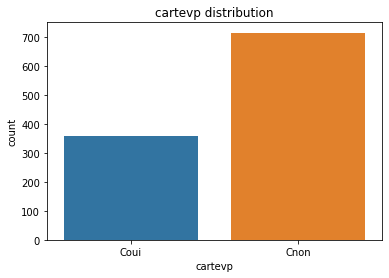

In [12]:
sns.countplot(x=visa.cartevp)
plt.title(f'cartevp distribution')

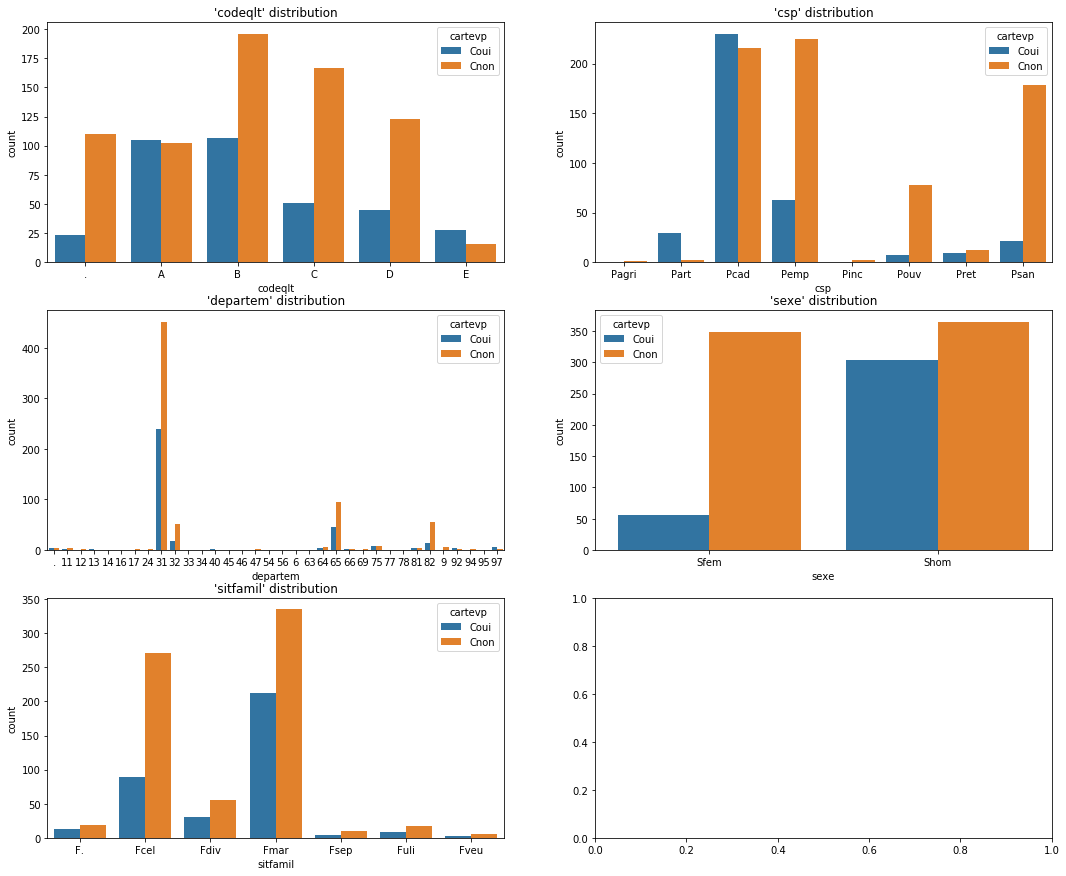

In [13]:
visa_quali = visa[quali_vars]

nrow, ncol = 3,2
fig, axs = plt.subplots(nrow, ncol, figsize=(18,5*nrow))

for i in range(visa_quali.shape[1]):
    row, col = i//ncol, i%ncol
    ax = axs[row, col]
    var_name = quali_vars[i]
    
#     visa_quali[var_name].value_counts().sort_index().plot.bar(ax=ax)
    sns.countplot(x=visa_quali[var_name], hue=visa.cartevp,
                  order=np.sort(visa_quali[var_name].unique()), ax=ax)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title(f'{var_name!r} distribution')

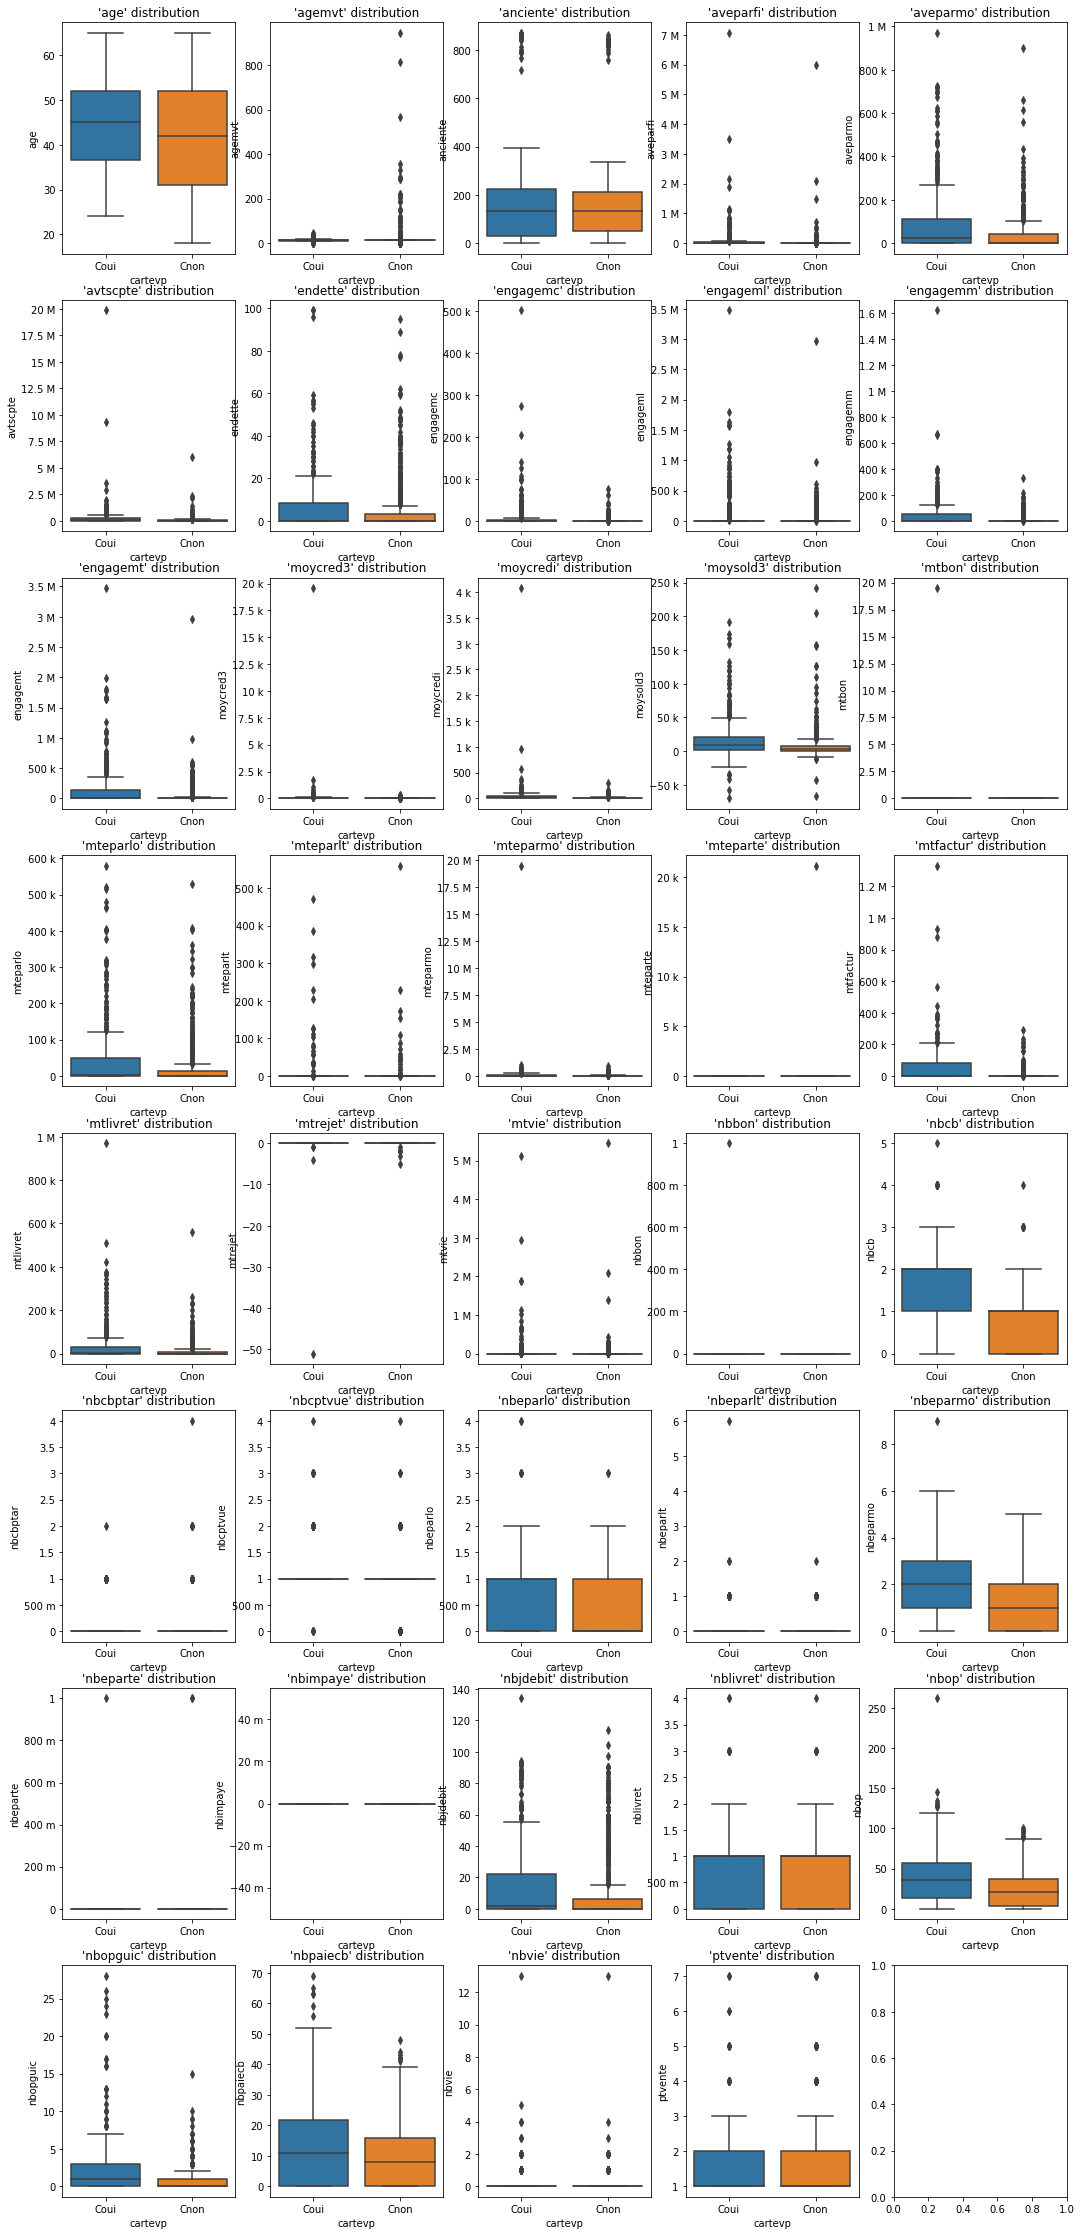

In [14]:
visa_quanti = visa[quanti_vars]
nvars = visa_quanti.shape[1]
ncol = 5
nrow  = nvars // ncol + (1 if nvars%ncol != 0 else 0)
fig, axs = plt.subplots(nrow, ncol, figsize=(18,5*nrow))

for i in range(nvars):
    row, col = i//ncol, i%ncol
    ax = axs[row, col]
    var_name = quanti_vars[i]
    
    s = visa_quanti[var_name].astype('str')
    s = s[s != '.'].astype(int) # elimination des valeurs manquantes et transformation en entier
#     s.plot.hist(ax=ax)
    sns.boxplot(x=visa.cartevp, y=s, ax=ax)
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title(f'{var_name!r} distribution')

### Analyse multivariée

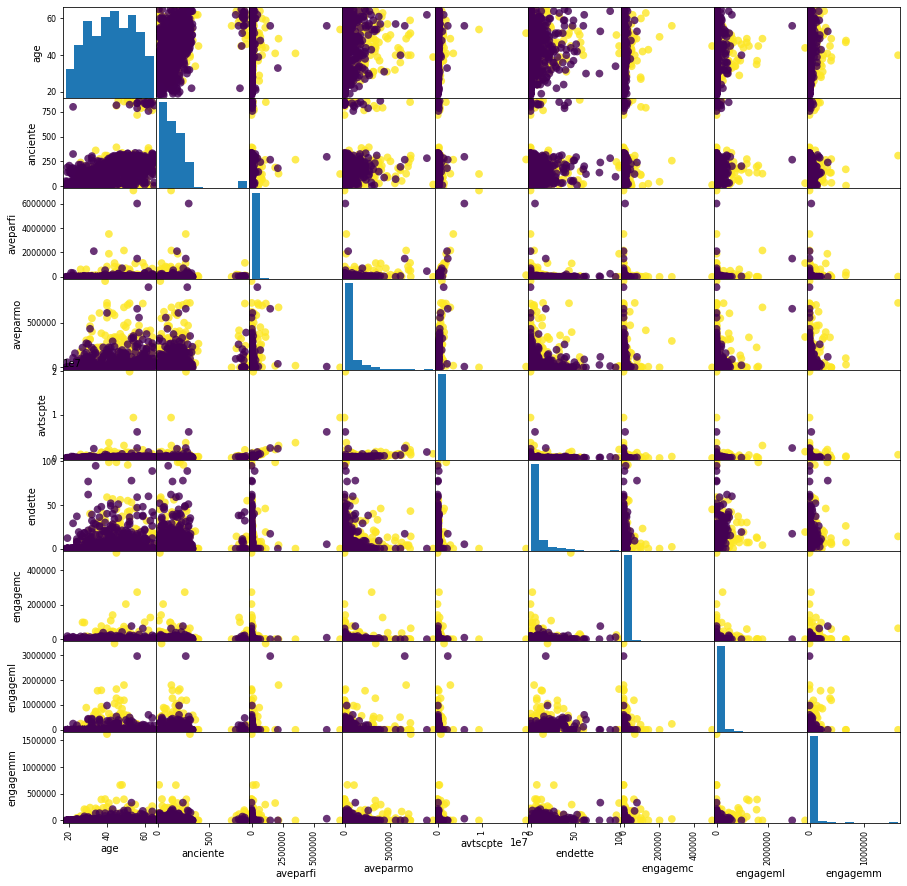

In [15]:
# sns.pairplot(visa_quanti.iloc[:,:4], hue=visa.cartevpr)
pd.plotting.scatter_matrix(visa_quanti.iloc[:,:10], c=visa.cartevpr, figsize=(15, 15), marker='o', s=60, alpha=.8);

## Classification supervisée

In [16]:
# Load libraries

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Préparation des données

In [17]:
dataset = visa_quanti.iloc[:, :10]
dataset = dataset.loc[:, ~dots[dataset.columns].any(axis=0)]

# Data visualizations

# density
# dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
# plt.show()

# # scatter plot matrix
# pd.plotting.scatter_matrix(dataset)
# plt.show()
# # correlation matrix
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
# fig.colorbar(cax)
# plt.show()

# Prepare Data

# Split-out validation dataset
array = dataset.values
# X = array[:,0:60].astype(float)
# Y = array[:,60]
X = array.astype(float)
Y = visa.cartevpr.values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Evaluate Algorithms

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

## Classification supervisée

LR: 0.7425 (0.05628)
LDA: 0.7239 (0.04690)
KNN: 0.7482 (0.03714)
CART: 0.7097 (0.04364)
NB: 0.7354 (0.05554)
SVM: 0.6679 (0.04459)


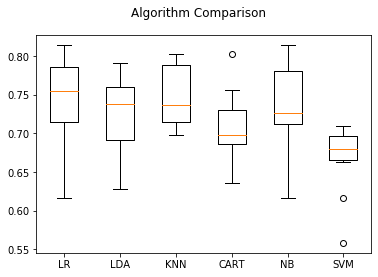

In [18]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.4f} ({cv_results.std():.5f})"
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

ScaledLR: 0.752969 (0.040232)
ScaledLDA: 0.723871 (0.046903)
ScaledKNN: 0.750643 (0.045085)
ScaledCART: 0.700397 (0.057831)
ScaledNB: 0.730780 (0.049425)
ScaledSVM: 0.748290 (0.045508)


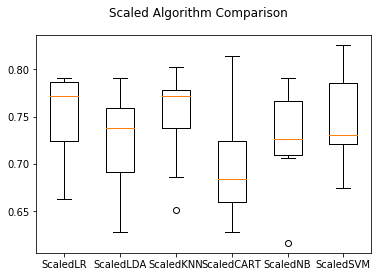

Best: 0.756410 using {'n_neighbors': 3}
0.729604 (0.033576) with: {'n_neighbors': 1}
0.756410 (0.053839) with: {'n_neighbors': 3}
0.755245 (0.049860) with: {'n_neighbors': 5}
0.748252 (0.050869) with: {'n_neighbors': 7}
0.751748 (0.041307) with: {'n_neighbors': 9}
0.736597 (0.034610) with: {'n_neighbors': 11}
0.737762 (0.044729) with: {'n_neighbors': 13}
0.731935 (0.050888) with: {'n_neighbors': 15}
0.726107 (0.057451) with: {'n_neighbors': 17}
0.728438 (0.058430) with: {'n_neighbors': 19}
0.723776 (0.060088) with: {'n_neighbors': 21}
Best: 0.750583 using {'C': 1.0, 'kernel': 'rbf'}
0.735431 (0.042853) with: {'C': 0.1, 'kernel': 'linear'}
0.698135 (0.049825) with: {'C': 0.1, 'kernel': 'poly'}
0.735431 (0.047795) with: {'C': 0.1, 'kernel': 'rbf'}
0.722611 (0.053195) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.741259 (0.044560) with: {'C': 0.3, 'kernel': 'linear'}
0.699301 (0.052328) with: {'C': 0.3, 'kernel': 'poly'}
0.748252 (0.043718) with: {'C': 0.3, 'kernel': 'rbf'}
0.714452 (0.045086) 

In [19]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='lbfgs', max_iter=1000))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='auto')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


AB: 0.778564 (0.037813)
GBM: 0.770424 (0.031468)
RF: 0.749508 (0.035954)


/mnt/c/python-envs/mlds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/mnt/c/python-envs/mlds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/mnt/c/python-envs/mlds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/mnt/c/python-envs/mlds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/mnt/c/python-envs/mlds/lib/python3.7/si

ET: 0.764501 (0.025543)


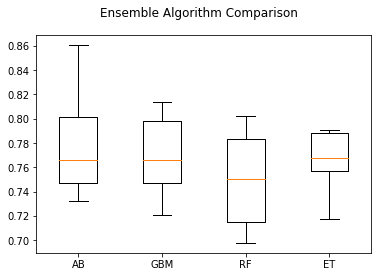

0.7209302325581395
[[130  11]
 [ 49  25]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       141
           1       0.69      0.34      0.45        74

    accuracy                           0.72       215
   macro avg       0.71      0.63      0.63       215
weighted avg       0.72      0.72      0.69       215



In [20]:
# ensembles
ensembles = [
    ('AB', AdaBoostClassifier(), None),
    ('GBM', GradientBoostingClassifier(), None),
    ('RF', RandomForestClassifier(), None),
    ('ET', ExtraTreesClassifier(), None)
]

results = []
names = []
for name, model, cv_params in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

#### Methodes ensemblistes 

In [21]:
# # Bagged Decision Trees for Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# seed = 7
# kfold = KFold(n_splits=10, random_state=seed)
# cart = DecisionTreeClassifier()
# num_trees = 100
# model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())


In [22]:
# # Stochastic Gradient Boosting Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import GradientBoostingClassifier
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# seed = 7
# num_trees = 100
# kfold = KFold(n_splits=10, random_state=seed)
# model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# results = cross_val_score(model, X, Y, cv=kfold)
# print(results.mean())


In [23]:
# # Voting Ensemble for Classification
# from pandas import read_csv
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]
# kfold = KFold(n_splits=10, random_state=7)
# # create the sub models
# estimators = []
# model1 = LogisticRegression()
# estimators.append(('logistic', model1))
# model2 = DecisionTreeClassifier()
# estimators.append(('cart', model2))
# model3 = SVC(gamma='auto')
# estimators.append(('svm', model3))
# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# results = cross_val_score(ensemble, X, Y, cv=kfold)
# print(results.mean())
